# "Hello Julia" -- An Interactive Look at My First Experience with the MIT Incubated Open Source Programming Language

## Abstract

The Julia language is approximately seven years old.  Many PhUSE members have not been introduced to it yet.  Python and R may be a bit more familiar.  Jupyter Notebooks enable the running of Julia, Python and R scripts.  Julia is a very fast, dynamic and easy-to-learn programming language, it can be utilized to perform general programming tasks, write UIs, perform machine learning, compile code statically or deploy to a web server, and fully supports all aspects of programming for data science.

This presentation will walk through some simple programming code to produce output in Julia's REPL command line environment.  The focus will then move to running Julia code within a Jupyter Notebook for executing general ETL tasks like reading data, transforming it for analysis and producing data visualizations.  During the conclusion, we shall discuss ways to utilize Julia in our traditional and day-to-day projects.

**Project:          **  Julia Proof of Concept using FAERS Data 

**Notebook Name:    **  Hello Julia

**Data Scientists:  **  Richard Bryant, Chris Hurley

**Purpose:          **  ETL and Analytics

**Macros called:    **  There are no standard or external macros or functions called within this notebook

**Limitations:      **  Ensure that any installed packages and functions are not deprecated 

**Versions:         **  Julia 1.0.3

**Platform:         **  Datacise 1.0

**Development date: **  14JUN2019

**Notes:            **  Utilize GitHub to version this Jupyter Notebook

#### Procedure

* Data are downloaded from the FAERS website: https://fis.fda.gov/extensions/FPD-QDE-FAERS/FPD-QDE-FAERS.html
* Data are uploaded manually to the Microsoft Azure Blob Storage Containter "faerspoc".
* Make sure to "connect" to the storage container (only happens once) 
* Using the DataFrames package in Julia, the 2017 Q2 data are imported using the readtable() function. 
* Next, the data must be transformed into a "tidy" format for analytics to be run.  This transformation (joining, filtering, subsetting, grouped summaries) is performed using Julia.
* Functions are written for the analytics.  This enables the functions to be proactively applied to other analytics endeavors.
    * These functions are based on the 2018 FAERS proof of concept.
* Lastly, the visualization functions are run.  Output is embedded into a Jupyter Notebook.
* The end user will "ingest" the analytics via a combination of a Jupyter Notebook with documentation, code, and comments included.  More complex analytics may be provided via PowerBI.

#### Placeholder for project documentation

## Entity Relationship Diagram

<img src="ERD.JPG">

## Global Macros and Functions

In [1]:
# Macro to determine how many records are coming from each file 
# UserMacro prtnumrecs
macro prtnumrecs(dsname) 
    sd = :(size($dsname,1))
    nr = eval(sd)
    println("Number of records in $dsname", " is ", nr)
end

@prtnumrecs (macro with 1 method)

In [2]:
# Function to show a user specified number of lines from a user specified dataframe
# UserFunction displayrecs
function displayrecs(dfname, numlines)
    withenv("LINES" => numlines) do
        display(dfname)
    end
end

displayrecs (generic function with 1 method)

## Code: ETL

In [3]:
# Must add DataFrames, CSV, StatFiles, VegaLite, and ORCA packages needed for this project
# import Pkg; Pkg.add("Pkg")
# Pkg.add("DataFrames")
# Pkg.add("CSV")
# Pkg.add("StatFiles")
# Pkg.add("VegaLite") 
# Pkg.build("VegaLite")
# import Pkg; Pkg.add("ORCA")
# Pkg.build("PyCall")
# Set the kernel options to remove any version warnings for this program execution
using IJulia
IJulia.installkernel("Julia nodeps", "--depwarn=no")

┌ Info: Installing Julia nodeps kernelspec in C:\Users\churley\AppData\Roaming\jupyter\kernels\julia-nodeps-1.1
└ @ IJulia C:\Users\churley\.juliapro\JuliaPro_v1.1.1.1\packages\IJulia\gI2uA\deps\kspec.jl:72


"C:\\Users\\churley\\AppData\\Roaming\\jupyter\\kernels\\julia-nodeps-1.1"

In [4]:
# Load required Julia Package libraries
using DataFrames, CSV, StatFiles

In [8]:
# Read tables on Datacise using the updated CSV.jl package v0.5.3
# demo17q2 = CSV.read("C:\\Users\\rbryant\\Desktop\\HAC\\FAERS_2017\\DEMO17Q2.txt"; header = 1, delim = '$')
# drug17q2 = CSV.read("C:\\Users\\rbryant\\Desktop\\HAC\\FAERS_2017\\DRUG17Q2.txt"; header = 1, delim = '$')
# indi17q2 = CSV.read("C:\\Users\\rbryant\\Desktop\\HAC\\FAERS_2017\\INDI17Q2.txt"; header = 1, delim = '$')
# outc17q2 = CSV.read("C:\\Users\\rbryant\\Desktop\\HAC\\FAERS_2017\\OUTC17Q2.txt"; header = 1, delim = '$')
# reac17q2 = CSV.read("C:\\Users\\rbryant\\Desktop\\HAC\\FAERS_2017\\REAC17Q2.txt"; header = 1, delim = '$')
# rpsr17q2 = CSV.read("C:\\Users\\rbryant\\Desktop\\HAC\\FAERS_2017\\RPSR17Q2.txt"; header = 1, delim = '$')
# ther17q2 = CSV.read("C:\\Users\\rbryant\\Desktop\\HAC\\FAERS_2017\\THER17Q2.txt"; header = 1, delim = '$')

# Read tables on Datacise using the updated CSV.jl package v0.5.3
demo17q2 = CSV.read("C:\\Users\\churley\\data\\DEMO17Q2.txt"; header = 1, delim = '$')
drug17q2 = CSV.read("C:\\Users\\churley\\data\\DRUG17Q2.txt"; header = 1, delim = '$')
indi17q2 = CSV.read("C:\\Users\\churley\\data\\INDI17Q2.txt"; header = 1, delim = '$')
outc17q2 = CSV.read("C:\\Users\\churley\\data\\OUTC17Q2.txt"; header = 1, delim = '$')
reac17q2 = CSV.read("C:\\Users\\churley\\data\\REAC17Q2.txt"; header = 1, delim = '$')
rpsr17q2 = CSV.read("C:\\Users\\churley\\data\\RPSR17Q2.txt"; header = 1, delim = '$')
ther17q2 = CSV.read("C:\\Users\\churley\\data\\THER17Q2.txt"; header = 1, delim = '$')

# Read tables on local desktop using the updated CSV.jl package v0.5.3
# demo17q2 = CSV.read("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\DEMO17Q2.txt"; header = 1, delim = '$')
# drug17q2 = CSV.read("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\DRUG17Q2.txt"; header = 1, delim = '$')
# indi17q2 = CSV.read("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\INDI17Q2.txt"; header = 1, delim = '$')
# outc17q2 = CSV.read("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\OUTC17Q2.txt"; header = 1, delim = '$')
# reac17q2 = CSV.read("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\REAC17Q2.txt"; header = 1, delim = '$')
# rpsr17q2 = CSV.read("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\RPSR17Q2.txt"; header = 1, delim = '$')
# ther17q2 = CSV.read("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\THER17Q2.txt"; header = 1, delim = '$')
# ther17q2 = CSV.read("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\THER17Q2.txt"; header = 1, delim = '$', datarow=195880)

,primaryid,caseid,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
,Int64,Int64,Int64,Int64⍰,Int64⍰,Float64⍰,String⍰
1,100052112,10005211,1,2013,missing,missing,missing
2,100052112,10005211,3,20130612,missing,missing,missing
3,100052112,10005211,4,2013,2013,missing,missing
4,100052112,10005211,5,2013,missing,missing,missing
5,100062493,10006249,1,20120105,20120109,missing,missing
6,100062493,10006249,2,20120110,20120201,missing,missing
7,100062493,10006249,3,20120202,20130102,missing,missing
8,100062493,10006249,4,20130102,missing,missing,missing
9,100062493,10006249,5,20101022,20130919,missing,missing


In [9]:
# Taking a quick look at one of the records in the warning to confirm that the value is appropriate 
# First get the column description for column 15 and then select a few records to confirm values.

In [10]:
describe(drug17q2)

,variable,mean,min
,Symbol,Union…,Any
1,primaryid,1.49595e8,38853455
2,caseid,1.32713e7,3885345
3,drug_seq,6.13917,1
4,role_cod,,C
5,drugname,,LOSARTIN
6,prod_ai,,"(1-743)-(1638-2332)-BLOOD-COAGULATION FACTOR VIII (SYNTHETIC HUMAN) FUSION PROTEIN WITH IMMUNOGLOBULIN G1 (SYNTHETIC HUMAN FC DOMAIN FRAGMENT), (1444-6'),(1447-9')-BIS(DISULFIDE) WITH IMMUNOGLOBULIN G1 (SYNTHETIC HUMAN FC DOMAIN FRAGMENT)"
7,val_vbm,1.02109,1
8,route,,Buccal
9,dose_vbm,,"13.75 MG, UNK"


In [11]:
drug17q2.exp_dt[1127910:1127912]  #The values look fine

3-element Array{Union{Missing, String},1}:
 missing            
 "20190303,20190221"
 missing            

In [12]:
#How many records are coming from each file using prtnumrecs user defined macro
@prtnumrecs(demo17q2)
@prtnumrecs(drug17q2)
@prtnumrecs(indi17q2)
@prtnumrecs(outc17q2)
@prtnumrecs(reac17q2)
@prtnumrecs(rpsr17q2)
@prtnumrecs(ther17q2)       

Number of records in demo17q2 is 337398
Number of records in drug17q2 is 1188078
Number of records in indi17q2 is 816254
Number of records in outc17q2 is 232053
Number of records in reac17q2 is 987728
Number of records in rpsr17q2 is 15768
Number of records in ther17q2 is 454078


In [14]:
# Read SAS dictionary data using a function from the StatFiles package and load into a dataframe
using ReadStat, DataFrames, StatFiles

# meddra20 = load from Datacise
m20 = read_sas7bdat("C:\\Users\\churley\\data\\meddra20_0.sas7bdat")

# meddra20 = load from desktop
# m20 = read_sas7bdat("C:\\Users\\hurle\\Anaconda3\\Juliaprog\\Q2Data\\meddra20_0.sas7bdat")
meddra20 = DataFrame(m20.data, m20.headers)

,llt_code,llt_name,pt_code,llt_whoart_code
,DataValu…,DataValu…,DataValu…,DataValu…
1,1.0e7,"""\""Ventilation\"" pneumonitis""",1.00019e7,""""""
2,1.0e7,"""\""Ventilation\"" pneumonitis""",1.00019e7,""""""
3,1.0e7,"""11-beta-hydroxylase deficiency""",1.0e7,""""""
4,1.0e7,"""11-beta-hydroxylase deficiency""",1.0e7,""""""
5,1.0e7,"""11-oxysteroid activity incr""",1.00333e7,""""""
6,1.0e7,"""11-oxysteroid activity increased""",1.00333e7,""""""
7,1.0e7,"""17 ketosteroids urine""",1.0e7,""""""
8,1.00616e7,"""17 ketosteroids urine abnormal""",1.00616e7,""""""
9,1.0e7,"""17 ketosteroids urine abnormal NOS""",1.00616e7,""""""


In [15]:
# Use the size function within println to show number of records in dataframe
println("Records in meddra20: ", size(meddra20, 1))

Records in meddra20: 120267


In [16]:
# There are some columns that need to be renamed.
# We can envision a future state where this is automated... for now manual.
indi17q2 = rename(indi17q2, :indi_drug_seq => :drug_seq)
ther17q2 = rename(ther17q2, :dsg_drug_seq => :drug_seq);

### Code: ETL (Perform joins per specifications)

In [17]:
# Perform joins to match specifications  
# Pull in indications for use into drug file table
drug_ind = join(
    drug17q2[:, [:primaryid, :caseid, :drug_seq, :drugname, :route, :cum_dose_chr, :dose_amt,
      :dose_unit, :dose_form, :dose_freq, :role_cod]],
    indi17q2[:, [:primaryid, :drug_seq, :indi_pt]],
    on = [:primaryid, :drug_seq], kind = :left
)
@prtnumrecs(drug_ind)

drug_ind_ther = join(
    drug_ind, ther17q2[:, [:primaryid, :drug_seq, :start_dt, :end_dt, :dur, :dur_cod]],
    on = [:primaryid, :drug_seq], kind = :left
)
@prtnumrecs(drug_ind_ther)

# Pull reaction data into patient demographic table
demo_reac = join(
    demo17q2[:, [:primaryid, :caseid, :event_dt, :age, :age_cod, :age_grp, :sex, :wt, :occr_country]],
    reac17q2[:, [:primaryid, :pt, :drug_rec_act]],
    on = :primaryid, kind = :left,
)
@prtnumrecs(demo_reac)

# Pull outcomes information into the previous table
demo_reac_out = join(
    demo_reac, outc17q2[:, [:primaryid, :outc_cod]], on = :primaryid, kind = :left
)
@prtnumrecs(demo_reac_out)

# Concatenate previous table with report source information
demo_reac_out_source = join(
    demo_reac_out, rpsr17q2[:, [:primaryid, :rpsr_cod]], on = :primaryid, kind = :left
)
@prtnumrecs(demo_reac_out_source)

# Lastly, join the (Drug/Therapy/Indication) and (Demographic/Reaction/Outcome/Report Source)
# combined sets into one set with all this information in one place.
faers17 = join(drug_ind_ther, deletecols!(demo_reac_out_source, :caseid), on = :primaryid, kind = :left);
@prtnumrecs(faers17)

Number of records in drug_ind is 1189407
Number of records in drug_ind_ther is 1189460
Number of records in demo_reac is 987728
Number of records in demo_reac_out is 1243921
Number of records in demo_reac_out_source is 1244199
Number of records in faers17 is 6943850


## Code: ETL (Transform)

### Code: Setup dataframes for all drugs and pilot drug which will be used later within the analytics code

In [18]:
########## Perform transformations
# Begin by storing a vector of counts by PT, where PT is "Preferred Term", or the event.
faers17q2_1 = by(faers17, :pt, d -> DataFrame(count_pt_17q2 = nrow(d)))
@prtnumrecs(faers17q2_1)

# Append this vector to the combined FAERS dataset.
faers17q2_2 = join(faers17, faers17q2_1, on = :pt, kind = :left, makeunique = true)
@prtnumrecs(faers17q2_2)

# Create a vector of counts by combination of Drug, and PT.
faers17q2_3 = by(faers17q2_2, [:drugname, :pt],
    d -> DataFrame(count_dpt_17q2 = nrow(d)))
@prtnumrecs(faers17q2_3)

# Append this vector to the original dataset
faers17q2_4 = join(faers17q2_2, faers17q2_3, on = [:drugname, :pt], kind = :left,
    makeunique = true)
@prtnumrecs(faers17q2_4)

# Create a percentage variable by Drug/PT
faers17q2_4[:count_percentage_17q2] =
    (faers17q2_4[:count_dpt_17q2] ./ faers17q2_4[:count_pt_17q2]) .* 100;
@prtnumrecs(faers17q2_4)
########## End transformations

Number of records in faers17q2_1 is 10801
Number of records in faers17q2_2 is 6943850
Number of records in faers17q2_3 is 1428007
Number of records in faers17q2_4 is 6943850
Number of records in faers17q2_4 is 6943850


In [19]:
# Display some records from a dataframe using the user defined displayrecs function
displayrecs(faers17q2_1, 5)

,pt,count_pt_17q2
,String⍰,Int64
1,Blood count abnormal,2685
2,Fatigue,91645
3,Tooth discolouration,270
4,Amaurosis fugax,87
5,Atrial fibrillation,17146
⋮,⋮,⋮


In [20]:
# Show dataframe faers17q2_2
withenv("LINES" => 7) do
    display(faers17q2_2)
end

,primaryid,caseid,drug_seq,drugname,route,cum_dose_chr,dose_amt,dose_unit
,Int64,Int64,Int64,String,String⍰,Float64⍰,Float64⍰,String⍰
1,100052112,10005211,1,JAKAFI,Oral,missing,missing,missing
2,100052112,10005211,1,JAKAFI,Oral,missing,missing,missing
3,100052112,10005211,1,JAKAFI,Oral,missing,missing,missing
4,100052112,10005211,2,JAKAFI,Oral,missing,5.0,MG
5,100052112,10005211,2,JAKAFI,Oral,missing,5.0,MG
6,100052112,10005211,2,JAKAFI,Oral,missing,5.0,MG
7,100052112,10005211,3,JAKAFI,Oral,missing,15.0,MG
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [21]:
#Show dataframe faers17q2_3
displayrecs(faers17q2_3, 10)

,drugname,pt,count_dpt_17q2
,String,String⍰,Int64
1,JAKAFI,Blood count abnormal,170
2,JAKAFI,Fatigue,552
3,JAKAFI,Tooth discolouration,3
4,PROPANOLOL /00030001/,Blood count abnormal,2
5,PROPANOLOL /00030001/,Fatigue,6
6,PROPANOLOL /00030001/,Tooth discolouration,2
7,REVLIMID,Amaurosis fugax,12
8,REVLIMID,Atrial fibrillation,237
9,REVLIMID,Constipation,492


In [22]:
#Show dataframe faers17q2_4
displayrecs(faers17q2_4, 10)

,primaryid,caseid,drug_seq,drugname,route
,Int64,Int64,Int64,String,String⍰
1,100052112,10005211,1,JAKAFI,Oral
2,100052112,10005211,1,JAKAFI,Oral
3,100052112,10005211,1,JAKAFI,Oral
4,100052112,10005211,2,JAKAFI,Oral
5,100052112,10005211,2,JAKAFI,Oral
6,100052112,10005211,2,JAKAFI,Oral
7,100052112,10005211,3,JAKAFI,Oral
8,100052112,10005211,3,JAKAFI,Oral
9,100052112,10005211,3,JAKAFI,Oral


In [23]:
# View final dataset.  ETL is complete for all drugs in Q2 2017. **Note the use of the "first" function.
first(faers17q2_4, 10)

,primaryid,caseid,drug_seq,drugname,route
,Int64,Int64,Int64,String,String⍰
1,100052112,10005211,1,JAKAFI,Oral
2,100052112,10005211,1,JAKAFI,Oral
3,100052112,10005211,1,JAKAFI,Oral
4,100052112,10005211,2,JAKAFI,Oral
5,100052112,10005211,2,JAKAFI,Oral
6,100052112,10005211,2,JAKAFI,Oral
7,100052112,10005211,3,JAKAFI,Oral
8,100052112,10005211,3,JAKAFI,Oral
9,100052112,10005211,3,JAKAFI,Oral


In [24]:
# Exploring with the describe() function:
drug_case_pct = faers17q2_4[:count_percentage_17q2]
describe(drug_case_pct)

Summary Stats:
Length:         6943850
Missing Count:  0
Mean:           2.358400
Minimum:        0.001091
1st Quartile:   0.071788
Median:         0.247934
3rd Quartile:   0.844322
Maximum:        100.000000
Type:           Float64


In [25]:
# Isolate the pilot drug
pilot_data = faers17q2_4[faers17q2_4[:drugname] .== "ATACAND", :]
@prtnumrecs(pilot_data)

# View pilot_data dataset.  ETL is complete.
first(pilot_data, 10)

Number of records in pilot_data is 1173


,primaryid,caseid,drug_seq,drugname,route,cum_dose_chr,dose_amt,dose_unit
,Int64,Int64,Int64,String,String⍰,Float64⍰,Float64⍰,String⍰
1,1070043015,10700430,3,ATACAND,Oral,missing,16.0,MG
2,1070043015,10700430,3,ATACAND,Oral,missing,16.0,MG
3,1070043015,10700430,3,ATACAND,Oral,missing,16.0,MG
4,1070043015,10700430,3,ATACAND,Oral,missing,16.0,MG
5,1070043015,10700430,3,ATACAND,Oral,missing,16.0,MG
6,112534959,11253495,12,ATACAND,Unknown,missing,8.0,MG
7,112534959,11253495,12,ATACAND,Unknown,missing,8.0,MG
8,112534959,11253495,12,ATACAND,Unknown,missing,8.0,MG
9,112534959,11253495,12,ATACAND,Unknown,missing,8.0,MG


## Code: Algorithms and Analytics

### Code: Analysis Data Subsets

In [26]:
# Creating dataframe for showing drug/pt combinations (using data from all drugs)

dall = faers17q2_4[:, [:primaryid, :sex, :pt, :occr_country, :drugname, 
    :age, :age_grp, :role_cod, :rpsr_cod, :count_pt_17q2, :count_dpt_17q2,
    :count_percentage_17q2]]

# Add a denominator and percentage
dall[:alldenom] = nrow(dall)
dall[:alldptpc] = (dall[:count_pt_17q2] ./ dall[:alldenom]) .* 100;

# Match the specs by renaming then sort in descending order
rename!(dall, :sex => :gender)
sort!(dall, :count_pt_17q2, rev = true)
  
#See some results
displayrecs(dall, 5)  

,primaryid,gender,pt,occr_country,drugname
,Int64,String⍰,String⍰,String⍰,String
1,100052112,missing,Fatigue,US,JAKAFI
2,100052112,missing,Fatigue,US,JAKAFI
3,100052112,missing,Fatigue,US,JAKAFI
4,100052112,missing,Fatigue,US,PROPANOLOL /00030001/
5,100052112,missing,Fatigue,US,PROPANOLOL /00030001/
⋮,⋮,⋮,⋮,⋮,⋮


In [27]:
# Creating dataframe for showing drug/pt combinations (using data for pilot drug - Atacand

datt = pilot_data[:, [:primaryid, :sex, :pt, :occr_country, :drugname, 
    :age, :age_grp, :role_cod, :rpsr_cod, :count_pt_17q2, :count_dpt_17q2,
    :count_percentage_17q2]]

# Add a denominator and percentage
datt[:attdenom] = nrow(datt)
datt[:attdptpc] = (datt[:count_dpt_17q2] ./ datt[:attdenom]) .* 100;

# Match the specs by renaming then sort in descending order
rename!(datt, :sex => :gender)
sort!(datt, :count_dpt_17q2, rev = true)
  
# See some results
displayrecs(datt, 5)

,primaryid,gender,pt,occr_country,drugname,age,age_grp,role_cod
,Int64,String⍰,String⍰,String⍰,String,Int64⍰,String⍰,String
1,1070043015,F,Dyspnoea,IL,ATACAND,66,missing,C
2,121678239,M,Dyspnoea,LB,ATACAND,56,missing,C
3,121678239,M,Dyspnoea,LB,ATACAND,56,missing,C
4,124472756,M,Dyspnoea,CA,ATACAND,83,missing,C
5,124472756,M,Dyspnoea,CA,ATACAND,83,missing,C
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


## Code: Visualizations

The following are required visualizations based on the 2018 FAERS pilot:

* Pie chart of gender in subset for drug 
    * OCCR_COUNTRY in DEMOYYQq
* Bar chart of adverse events by age group in subset for drug 
    * AGE_GRP in DEMOyyQq   
* Bar chart of role of the drug for adverse event in subset for drug 
    * ROLE_COD in DRUGyyQq
* Table of adverse events by drug, adverse events by drug (Q2), AE % in 2017 Q2 caused by drug
* Adverse event, SOC counts 
* Adverse event counts by quarter 
* Geomap of adverse events by country 
    * OCCR_COUNTRY in DEMOYYQq

### Code: Pie/Bar Chart of gender in 2017Q2

In [28]:
# Set up data presentation on Atacand - pie/bar charts

# Get the denominator for AEs
pieden = size(datt, 1)

# Setup a dataframe to be used for graphing
piegen = by(datt, :gender, nrow)
    sort!(piegen, :x1, rev = true)
    rename!(piegen, :x1 => :frequency)

# Check the numbers by printing the vector and the dataframe
println("The value of pieden: ", pieden)

# Create a new vector containing the percentage for each row within the dataframe
piegen[:gen_pct] =
    (piegen[:frequency] ./ pieden .* 100);

# Display some of the data from the dataframe
displayrecs(piegen,5)

,gender,frequency,gen_pct
,String⍰,Int64,Float64
1,F,634,54.0494
2,M,448,38.1927
3,missing,91,7.75789


The value of pieden: 1173


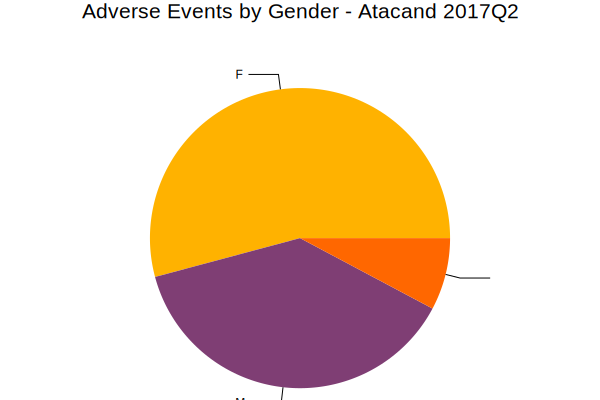

In [29]:
#Julia visualization showing Adverse Events by Gender 
using Plots
Plots.gr()

pie(piegen.gender,
    piegen.gen_pct,
    title = "Adverse Events by Gender - Atacand 2017Q2")
# color={"gender:n", scale={range=["gray","#e377c2","#1f77b4"]

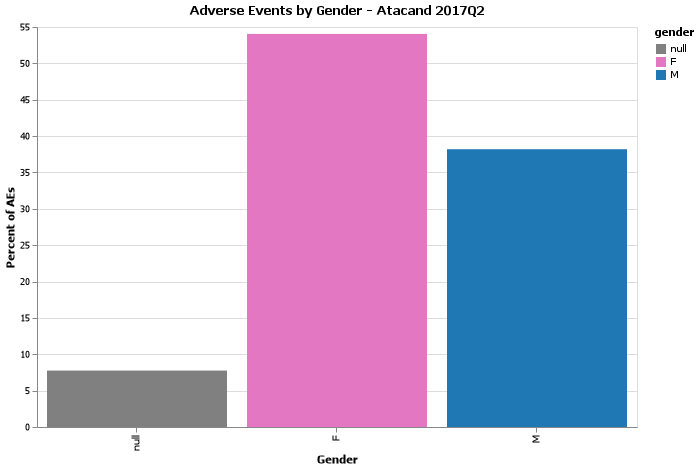

In [30]:
#Julia visualization using VegaLite v0.6.0
using VegaLite

piegen |> @vlplot(:bar, 
    x = {"gender:n", 
    axis = {title = "Gender"}},
    title = "Adverse Events by Gender - Atacand 2017Q2", 
    y = {:gen_pct, axis = {title = "Percent of AEs"}}, 
    color = {"gender:n", scale = {range = ["gray", "#e377c2", "#1f77b4"]}},
    height = 400,
    width = 600)

### Code: Bar chart of adverse events by age group - Atacand in 2017Q2

In [31]:
# Set up data presentation on Atacand age group - pie/bar charts

# Setup a dataframe to be used for graphing
attag = by(datt, :age_grp, nrow)
    println(typeof(attag[:age_grp]))
    sort!(attag, :x1, rev = true)
    rename!(attag, :x1 => :frequency)

# Check the numbers
displayrecs(datt, 5)

# Show dataframe attag
first(attag, 10)

PooledArrays.PooledArray{Union

,primaryid,gender,pt,occr_country,drugname,age,age_grp,role_cod
,Int64,String⍰,String⍰,String⍰,String,Int64⍰,String⍰,String
1,1070043015,F,Dyspnoea,IL,ATACAND,66,missing,C
2,121678239,M,Dyspnoea,LB,ATACAND,56,missing,C
3,121678239,M,Dyspnoea,LB,ATACAND,56,missing,C
4,124472756,M,Dyspnoea,CA,ATACAND,83,missing,C
5,124472756,M,Dyspnoea,CA,ATACAND,83,missing,C
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


{Missing, String},UInt32,1,Array{UInt32,1}}


,age_grp,frequency
,String⍰,Int64
1,missing,1043
2,E,69
3,A,61


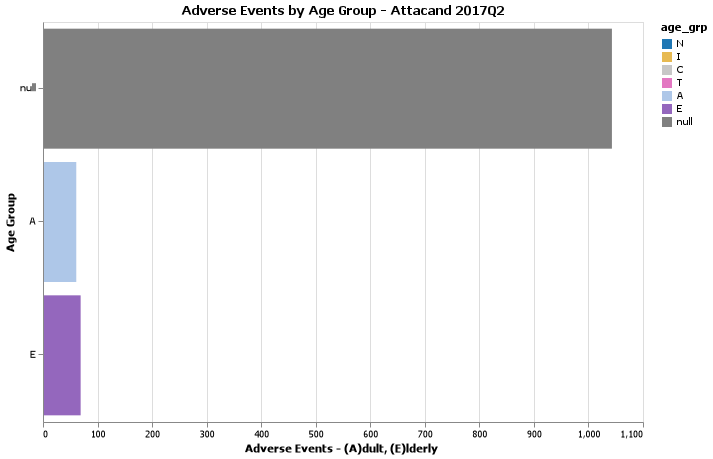

In [32]:
#Julia visualization using VegaLite v0.6.0
using VegaLite

attag |> @vlplot(:bar, 
    x = {:frequency, axis = {title = "Adverse Events - (A)dult, (E)lderly "}},
    title = "Adverse Events by Age Group - Attacand 2017Q2", 
    y = {
        :age_grp, 
        axis={
            title="Age Group"}
        }, 
    color = {
        :age_grp, 
        scale={
            domain=["N","I","C","T","A","E","null"],
            range=["#1f77b4","#e7ba52","#c7c7c7","#e377c2","#aec7e8","#9467bd","gray"]
            }
        },
    height=400,
    width=600)

### Code: Bar chart of adverse events by role of drug - Atacand in 2017Q2

In [ ]:
# Set up data presentation on Atacand by role of drug - pie/bar charts

# Setup a dataframe to be used for graphing
attar = by(datt, :role_cod, nrow)
    println(typeof(attar[:role_cod]))
    sort!(attar, :x1, rev = true)
    rename!(attar, :x1 => :frequency)

# Check the numbers
displayrecs(attar, 5)

In [ ]:
#Julia visualization using VegaLite v0.6.0
using VegaLite

attar |> @vlplot(:bar, 
    x = {:frequency, 
        axis = {title="Role of the Drug - 
                        (PS)Primary Suspect Drug, (SS) Secondary Suspect Drug,
                        (C)Concomitant, (I)Interacting"}
                },
        title = "Adverse Events by Role of the Drug - Attacand 2017Q2", 
        y = {:role_cod, 
            axis={
                title="Role of the Drug"
                }
            }, 
        color = {:role_cod, 
            scale = {
                domain=["C","PS","SS","I","null"],
                range=["#1f77b4","#e7ba52","#c7c7c7","#e377c2","gray"]
               }
            },
        height=400,
        width=600)

### Code: Heat Map of adverse events - Atacand in 2017Q2

In [ ]:
# Adverse Events Heat Map for 2017Q2 with all drug totals 

# Bring the all drug totals onto the Atacand rows by :primaryid
attau = unique(datt[:, [:pt, :count_dpt_17q2, :count_percentage_17q2]])
allau = unique(dall[:, [:pt, :count_pt_17q2, :alldptpc]])

atthma = join(attau, allau[:, [:pt, :count_pt_17q2, :alldptpc]], on = :pt, kind = :left)

# Number of records
@prtnumrecs(atthma)

# Show dataframe attag
first(atthma, 30)

### Code: Display world map charting patients with adverse events with Atacand in 2017Q2

In [ ]:
# Adverse Events Heat Map for 2017Q2 with all drug totals

# Bring all the drug totals onto the Atacand rows by :primaryid
attapts = unique(datt[:, [:primaryid]]) 

# Check the numbers
@prtnumrecs(attapts)

# Show dataframe attapts
first(attapts, 30)

# Subset for country
attcntry = unique(datt[:, [:occr_country]])

# Check the numbers
@prtnumrecs(attcntry)

# Show dataframe attag
first(attcntry, 30)

In [ ]:
# Adverse events by country

# Table for now, as a placeholder for a choropleth map.  Consider the JuliaGeo library
d1 = unique(faers17q2_4[:, [:primaryid, :pt, :occr_country]])
d2 = by(d1, :occr_country,
    d -> DataFrame(Frequency = nrow(d)))
sort!(d2, :Frequency, rev = true)

displayrecs(d2, 5)


In [ ]:
# Get total number of adverse events from all drugs in 17q2
# d1 = unique(faers17q2_4[:, [:primaryid, :sex, :pt, :occr_country, :drugname]])
d2 = by(faers17q2_4, [:pt, :count_pt_17q2], 
    d -> DataFrame(Frequency = nrow(d)))
sort!(d2, :Frequency, rev = true)
allaes17q2 = first(d2, 60)